# EMNIST Image Generation GAN

Name: Rejey Ezekiel<br/><br/>
Admin Number: P2348935<br/><br/>

Name: Ng Qing Yang<br/><br/>
Admin Number: ______<br/><br/>

Class: DAAA/FT/2A/01<br/><br/>
Module Code: ST1504 Deep Learning<br/>

<hr>

<h3>References (In Harvard format):</h3>
<ol>

</ol>


# Initialising Libraries and Variables

In [3]:
import os
import random
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Reshape, Conv2DTranspose
from keras.layers import Concatenate
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model
from keras import Input
from keras.optimizers import *
from keras.initializers import RandomNormal
from keras.layers import LeakyReLU
import numpy as np
from keras import Sequential, Model
from keras.layers import Dense, Conv2D, Reshape,BatchNormalization, Activation, Input, LeakyReLU, Dropout, Flatten, Conv2DTranspose
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import plotly as px
from scipy.ndimage import rotate, shift

In [4]:
# List physical GPUs and set memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# Loading Datasets


In [5]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('emnist-letters-train.csv', delimiter=',', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99035,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99036,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99037,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99038,-1,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174


# Exploratory Data Analysis

We will begin by conducting an exploratory data analysis of the data, to gain a better understanding of the characteristics of the dataset.

-   The First columns is the Labels since they are alphabetical there should only be 26 but in this case the count is from -1 to 26 (min - max), therefore there is a extra class which i will be labeling ?.

- There are 784 Columns in the dataset that makes up the Image.

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,...,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000
mean,12.018084,13.182553,13.182553,13.182553,13.182563,13.186127,13.197577,13.204645,13.201817,13.197920,...,13.182553,13.182553,13.182553,13.185279,13.182876,13.182553,13.182553,13.182553,13.182553,13.182553
std,8.367573,45.515594,45.515594,45.515594,45.515592,45.517474,45.534832,45.545344,45.542036,45.536994,...,45.515594,45.515594,45.515594,45.521483,45.515614,45.515594,45.515594,45.515594,45.515594,45.515594
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,26.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [7]:
df[0].unique()

array([23,  7, 16, 15, 17, 13, 11, 22, 24, 10, 14, 18, 21, 26, 19,  5, -1,
        3, 25,  2,  8,  4, 20,  9,  6, 12,  1], dtype=int64)

-   The Classes are almsot equal but the -1 class has 10240k images whereas classes 1-26 have roughly 3.4k with a little discrepancies.

In [8]:
import plotly.graph_objects as go

# Count the occurrences of each unique value in the df[0] column
value_counts = df[0].value_counts()
fig = go.Figure(data=[go.Bar(x=value_counts.index, y=value_counts.values)])
fig.update_layout(title='Number of Images in each Class',
                  xaxis_title='Unique Values',
                  yaxis_title='Count',
                  template='plotly_dark',
                  title_x=0.5)  
fig.update_xaxes(tickmode='array', tickvals=value_counts.index)
fig.show()

In [9]:
df[0].value_counts()

0
-1     10240
 25     3453
 11     3438
 5      3437
 24     3437
 20     3436
 17     3435
 16     3430
 9      3428
 26     3427
 8      3424
 23     3423
 22     3422
 21     3419
 18     3419
 3      3419
 12     3415
 15     3408
 10     3402
 13     3402
 4      3398
 2      3396
 1      3396
 6      3394
 19     3392
 7      3385
 14     3365
Name: count, dtype: int64

# Viewing the Images
-   We can see that the images Oreintation is wrong in the case belo we can see that G and H is not in the correct orientation and if left like this the GAN generation will also produce results like this, thus in Preprocessing will need to be done.

-   We can see that the images values range from 0 to 255.

In [10]:
print(df.iloc[0,1:].min())
print(df.iloc[0,1:].max())

0
255


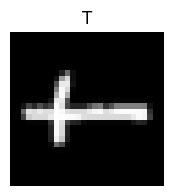

In [11]:
# plotting a random image from the dataset
plt.figure(figsize=(2,2))
idx = np.random.randint(0,len(df))
img = np.array(df.iloc[idx, 1:]).reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title(chr(df[0][idx] + 64))
plt.show()

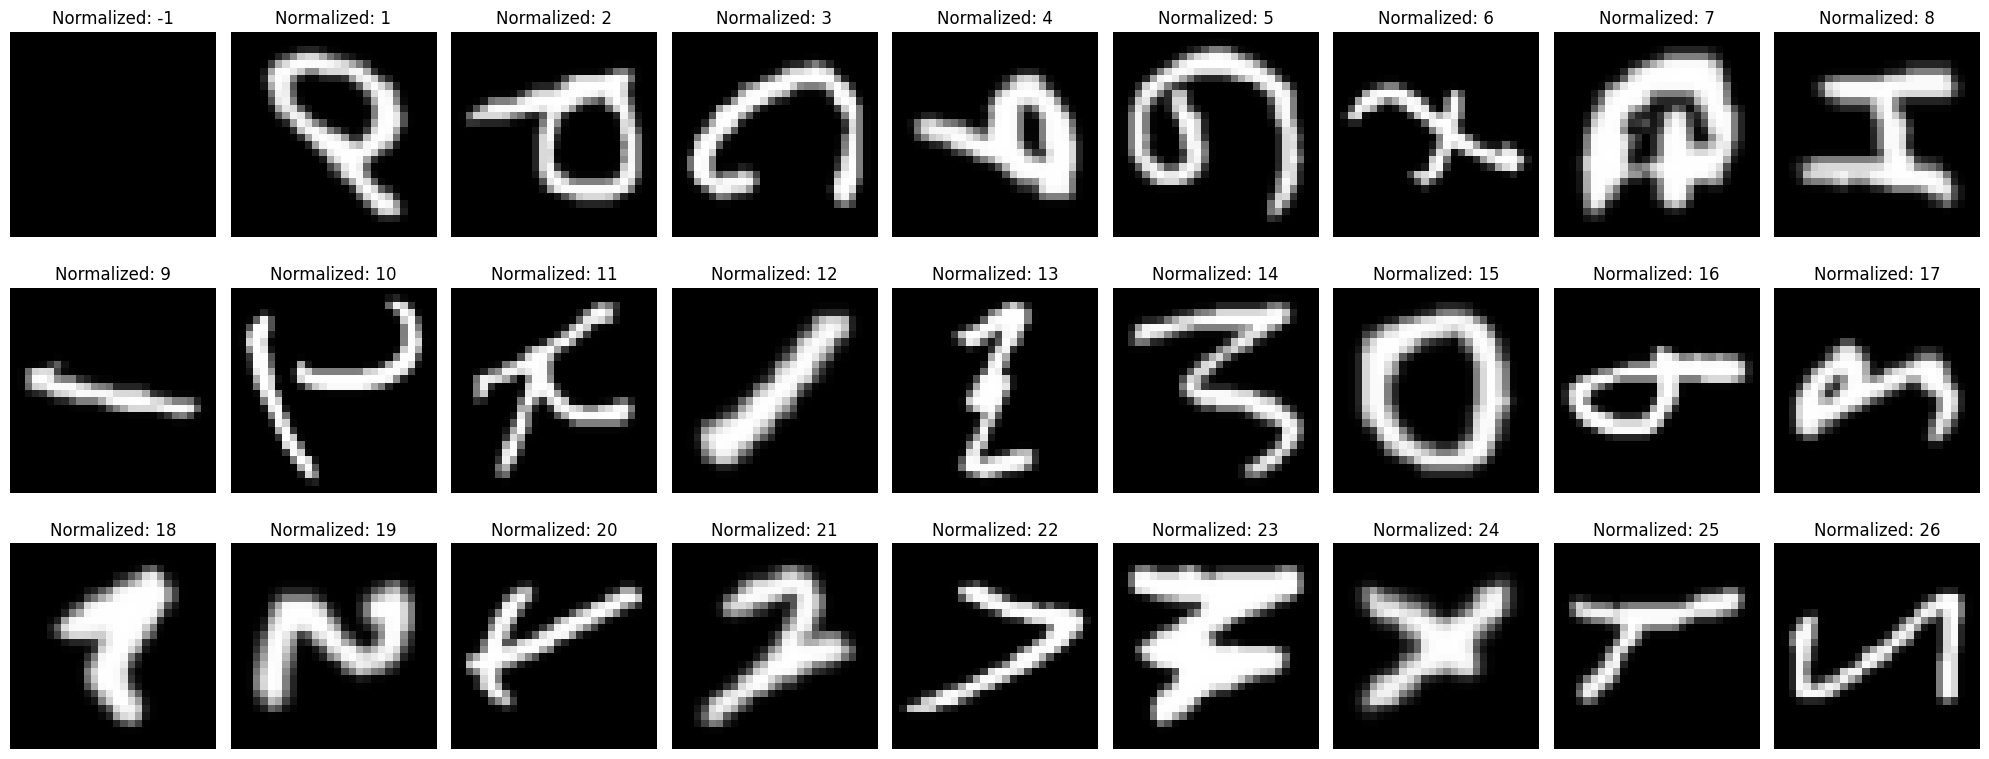

In [12]:
# Get unique labels (assuming you want the first 26 unique labels)
labels = df.iloc[:, 0].unique()
labels = np.sort(labels)

# Create the plot with sufficient subplots
fig, axes = plt.subplots(3, 9, figsize=(20, 8))  # Adjusted to 3 rows and 9 columns for demonstration
axes = axes.flatten()

for label, ax in zip(labels, axes):
    # Select the first row for each unique label
    image_data = df[df.iloc[:, 0] == label].iloc[0, 1:].values
    
    # Ensure the data is in numeric format
    image_data = np.array(image_data, dtype=np.float32)
    
    # Reshape the flat array into a 28x28 image
    image = image_data.reshape(28, 28)
    
    # Display the image
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Normalized: {label}')
    ax.axis('off')

# Hide any remaining empty subplots (if any)
for ax in axes[len(labels):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

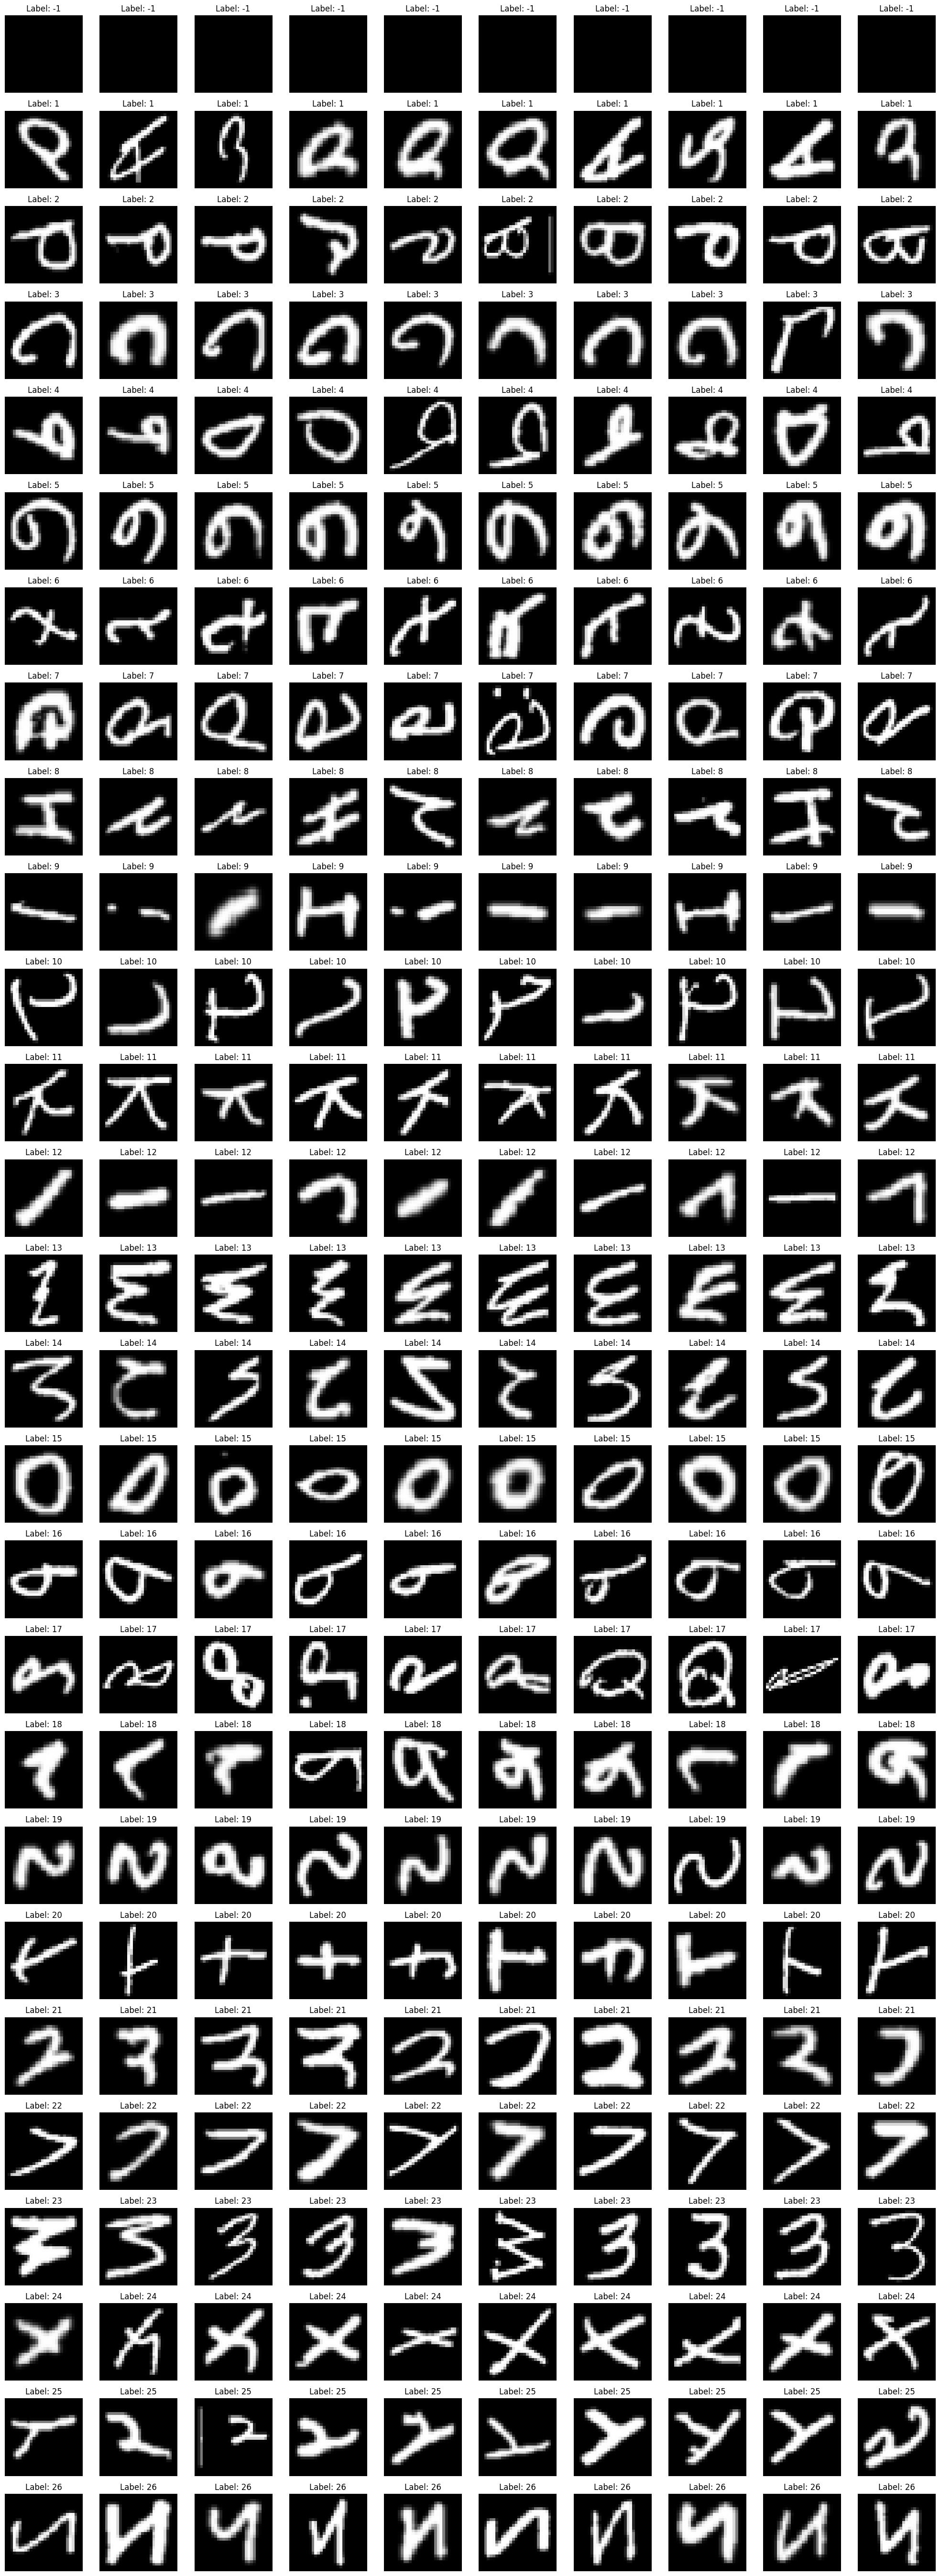

In [13]:
labels = df.iloc[:, 0].unique()
labels = np.sort(labels)

# Determine the total number of subplots required (10 images for each unique label)
num_labels = len(labels)
total_images = num_labels * 10

# Determine the grid size for subplots
grid_cols = 10  # 10 images per row for each label
grid_rows = num_labels  # One row for each label

# Create the plot with sufficient subplots
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(20, num_labels * 2))
axes = axes.flatten()

# Counter to keep track of the subplot index
subplot_index = 0

for label in labels:
    # Get the first 10 images for the current label
    images_data = df[df.iloc[:, 0] == label].iloc[:10, 1:].values
    
    for image_data in images_data:
        # Ensure the data is in numeric format
        image_data = np.array(image_data, dtype=np.float32)
        
        # Reshape the flat array into a 28x28 image
        image = image_data.reshape(28, 28)
        
        # Display the image
        ax = axes[subplot_index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f'Label: {label}')
        ax.axis('off')
        
        # Move to the next subplot
        subplot_index += 1

# Hide any remaining empty subplots (if any)
for ax in axes[subplot_index:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


# Image Averageing

-   Image Averaging involves stacking multiple photos on top of each other and averaging them together. The main purpose is to see the noise of the image adn therefore reducing it.
-   We can see the rough shapes of the Alpahbets.

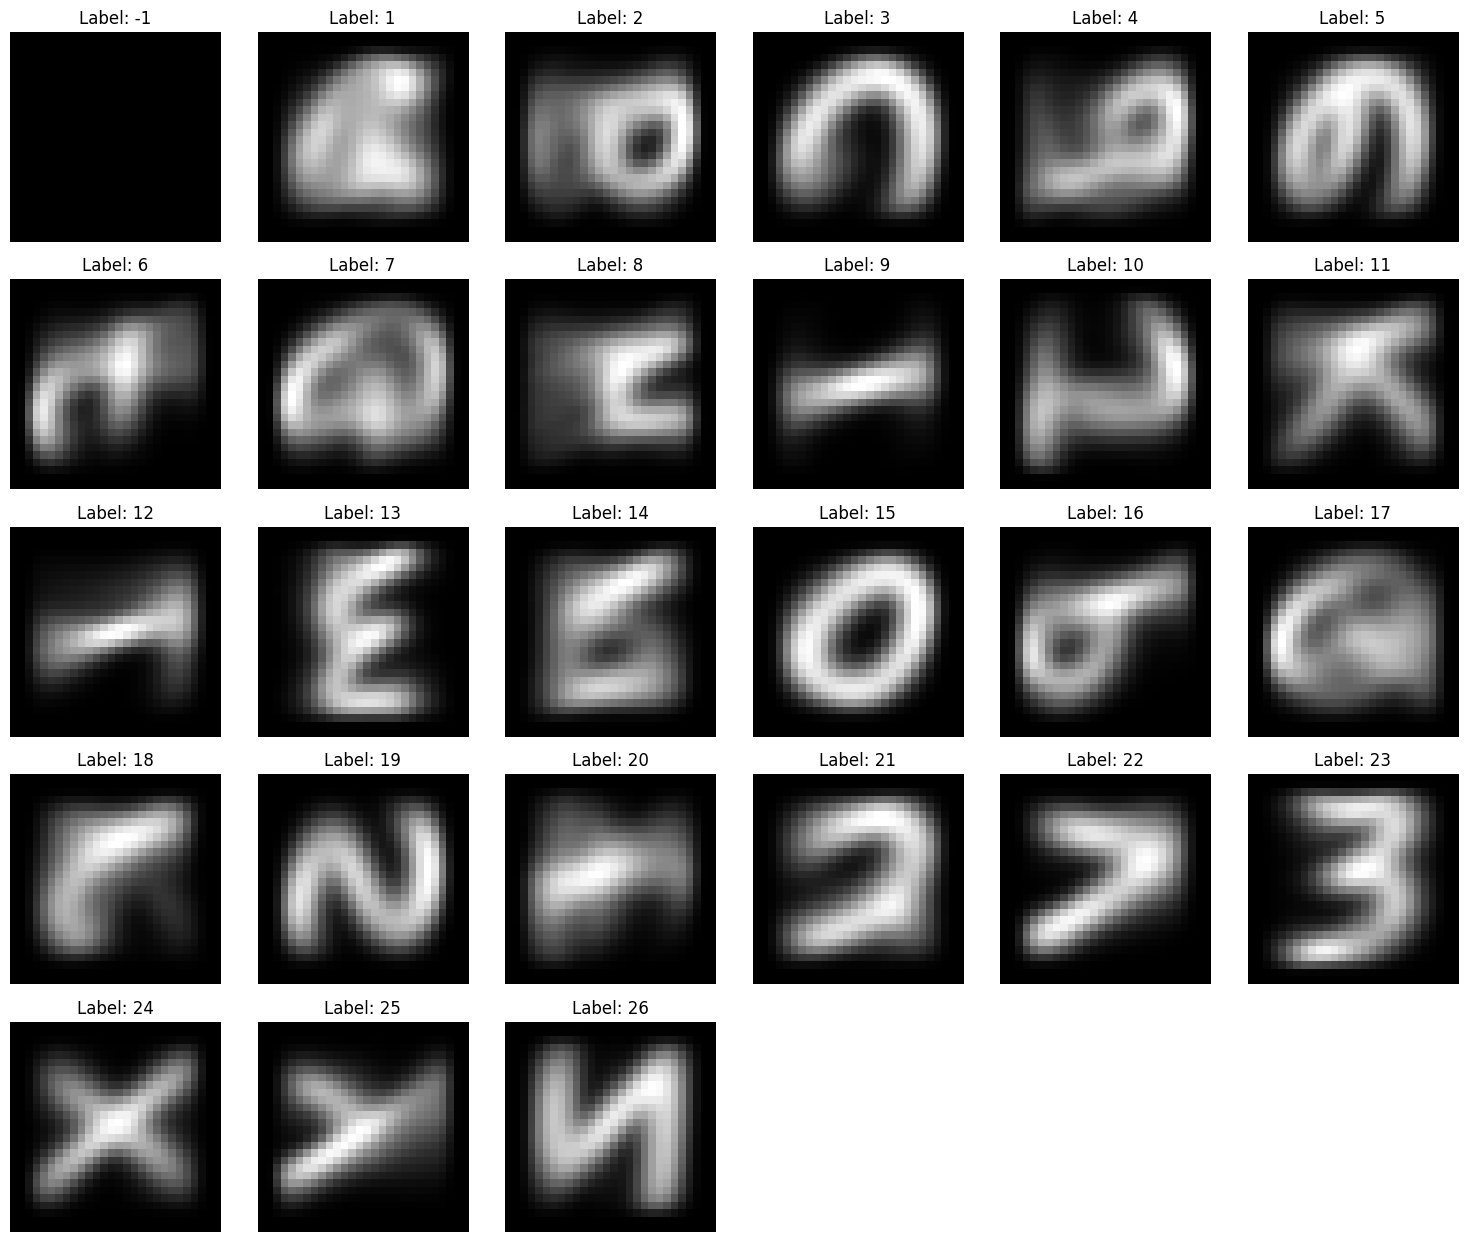

In [14]:
grouped = df.groupby(df[0])
num_labels = len(grouped)
grid_size = int(np.ceil(np.sqrt(num_labels)))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 15))

for (label, group), ax in zip(grouped, axes.flatten()):
    average_image = np.mean(group.iloc[:, 1:].values, axis=0)
    average_image = average_image.reshape(28, 28)
    ax.imshow(average_image, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {label}')
    
for i in range(num_labels, grid_size * grid_size):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

Since the -1 class is Nothing across the 10k Images and is not useful in to generate Alpahbetical Characters we will be removing it from the dataset.

In [15]:
df = df[df[0] != -1]

# Train Test Split into X and y
-   Remapping the Labels from 0 - 26 from 1 - 27.

In [16]:
# Define the mapping dictionary
mapping = {1: 0, 
           2: 1, 
           3: 2, 
           4: 3, 
           5: 4, 
           6: 5, 
           7: 6, 
           8: 7, 
           9: 8, 
           10: 9, 
           11: 10, 
           12: 11, 
           13: 12, 
           14: 13, 
           15: 14, 
           16: 15, 
           17: 16, 
           18: 17, 
           19: 18, 
           20: 19, 
           21: 20, 
           22: 21, 
           23: 22, 
           24: 23, 
           25: 24, 
           26: 25, 
           27: 26}

df[0] = df[0].map(mapping)

C:\Users\user\AppData\Local\Temp\ipykernel_28768\519577675.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Converting the the labels to a Numpy Array and to Categorical, and Converting the X axis to a Numpy Array too, and reshaping the image to 28 by 28 by 1 as we want the images to be in black and white only.

In [17]:
y_pre = np.array(df.iloc[:,0].values)
y_pre = pd.Categorical(y_pre)

X = np.array(df.iloc[:,1:].values)
X = X.reshape(-1,28,28,1)

# Preprocessing the images to correct the oreintation.
-   Rotating the Image by 90.
-   Verticaly Flipping the Images. 

In [18]:
preprocessed = []
for image in X:
    rotated_image = rotate(image, 90, reshape=False)
    flipped_image = np.flipud(rotated_image)
    preprocessed.append(flipped_image)
X_pre = np.array(preprocessed)
X = X_pre
X = X.astype('float32')
X_pre = (X - 127.5) / 127.5

In [ ]:
print(f'y_pre Uniqie : {y_pre.unique()}')
print(f'y_pre Shape : {y_pre.shape}')
print(f'X_pre Shape : {X_pre.shape}')

y_pre Uniqie : [22, 6, 15, 14, 16, ..., 19, 8, 5, 11, 0]
Length: 26
Categories (26, int64): [0, 1, 2, 3, ..., 22, 23, 24, 25]
y_pre Shape : (88800,)
X_pre Shape : (88800, 28, 28, 1)


# Utility Functions
- Saving Images into Directory

In [ ]:
def save_imgs(self, epoch, Dir_Name, File_Name):
    r, c = 10, 10
    noise = np.random.normal(0, 1, (r * c, self.latent_dim))
    gen_imgs = self.generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    os.makedirs(f'{Dir_Name}', exist_ok=True)
    fig.savefig(f"{Dir_Name}/{File_Name}_{epoch}.png")
    plt.close()

In [ ]:
def Learning_Curve(Model):
    cond_gan_hist_df = pd.DataFrame(Model.history)

    # using pandas dataframe to plot out learning curve
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8), tight_layout=True)
    cond_gan_hist_df.loc[:, ["d_loss", 'g_loss']].plot(
        ax=ax1, title=r'Learning Curve of Loss Function CE')
    cond_gan_hist_df.loc[:, ['D(x|y)', 'D(G(z|y))']].plot(
        ax=ax2, title=r'Learning Curve of Discriminator')
    cond_gan_hist_df.loc[:, 'KL Divergence'].plot(
        ax=ax3, title=r'Learning Curve of Probabilistic Similarity')
    plt.show()

In [ ]:
# Initialize an empty DataFrame
Model_Results = pd.DataFrame()

# Assuming baseModelHistory is a dictionary with history data
def Update_Models(History,Name,Batch_size):
    global Model_Results
    History = History.history

    print(History)
    
    # Find the index of the best validation accuracy
    best_val_idx = np.argmax(History["val_accuracy"])

    # Result dictionary for the best epoch
    result = {
        'Model Name': Name,
        'epoch': len(History["loss"]),
        'Batch Size': Batch_size,
        'best_val_accuracy': History["val_accuracy"][best_val_idx],
        'best_val_loss': History["val_loss"][best_val_idx],
        'accuracy': History["accuracy"][best_val_idx],
        'loss': History["loss"][best_val_idx]
    }

    # Convert the result dictionary to a DataFrame and append it
    result_df = pd.DataFrame([result])
    Model_Results = pd.concat([Model_Results, result_df], ignore_index=True)

# BaseLine Model

In [ ]:
class DCGAN():
    def __init__(self, rows, cols, channels, z = 100):
        # Input shape
        self.img_rows = rows
        self.img_cols = cols
        self.channels = channels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z
        optimizer = Adam(0.0002, 0.5)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        # For the combined model we will only train the generator
        
        # The discriminator takes generated images as input and
        # determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',optimizer=optimizer)

    def build_generator(self):
        model = Sequential()
        model.add(Dense(256 * 7 * 7, activation="relu", input_dim=self.latent_dim)) # connect the input to dense layer
        model.add(Reshape((7, 7, 256)))
        # upsample from 7*7 to 14*14
        model.add(Conv2DTranspose(128, (3,3), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        # upsample to 28x28
        model.add(Conv2DTranspose(64, (3,3), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(self.channels, kernel_size=3, padding="same", activation='tanh'))
        model.summary()
        noise = Input(shape=(self.latent_dim,))
        img = model(noise)
        
        return Model(noise, img)

    def build_discriminator(self):
        model = Sequential()
        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Conv2D(256, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Conv2D(512, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)
        
    def train(self, epochs, batch_size=1024, save_interval=1, gen_steps=1):
        # Load the dataset
        X_train = X_pre
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        batches_per_epoch = X_train.shape[0] // batch_size
        for epoch in range(epochs):
                # ---------------------
                # Train Discriminator
                # ---------------------
                # Select a random half of images
                idx = np.random.randint(0, X_train.shape[0], batch_size)
                imgs = X_train[idx]
                # Sample noise and generate a batch of new images
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                gen_imgs = self.generator.predict(noise)
                # Train the discriminator (real classified as ones
                # and generated as zeros)
                self.discriminator.trainable = True
                d_loss_real = self.discriminator.train_on_batch(imgs, valid)
                d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
                d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
                # ---------------------
                # Train Generator
                # ---------------------
                # Train the generator (wants discriminator to mistake
                # images as real)
                # Sample noise and generate a batch of new images
                self.discriminator.trainable = False
                for _ in range(1):
                    noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                    g_loss = self.combined.train_on_batch(noise, valid)
                    
                # Plot the progress
                print ("Epoch: %d/%d  Batch Size: %d/%d [loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch,epochs,batch,batches_per_epoch, d_loss[0], 100*d_loss[1], g_loss))

                # If at save interval => save generated image samples
                if epoch % save_interval == 0:
                    save_imgs(epoch,'Hello','hi')

In [ ]:
dcgan = DCGAN(28,28,1)
dcgan.train(epochs=200, batch_size=1024, save_interval=1)

NameError: name 'Adam' is not defined